In [1]:
!pip install pywavelets

In [2]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=33ba7ed325fea11ea8c5f6f53c24f4c05fb9962dd7d9fa495c2d2100d69117b7
  Stored in directory: c:\users\simmi\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [12]:
# imports
import numpy as np
from pylab import *
from preprocessing import get_preprocessed_data, get_test_data
from features import find_peaks
import audioFeatureExtraction

ModuleNotFoundError: No module named 'features'

In [14]:
x_dataA, y_labelA, framerate_A = get_preprocessed_data('A', N=2, factor=5)

x_dataB, y_labelB, framerate_B = get_preprocessed_data('B', N=2, factor=1)

C:\Users\simmi\Downloads\project 1111\preprocessing.py:116: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(raw_data)
C:\Users\simmi\Downloads\project 1111\preprocessing.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_data = np.array([down_sample(sample, factor=factor) for sample in raw_data]) #downsample
C:\Users\simmi\Downloads\project 1111\preprocessing.py:147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) 

FileNotFoundError: [Errno 2] No such file or directory: 'set_b/murmur_Btraining_noisymurmur_135_1306428972976_A.wav'

In [3]:
!pip install scikit-learn

In [ ]:
print(len(x_dataA))
print(len(x_dataB[0]))

In [15]:
x_testdataA = get_test_data('A')
x_testdataA = np.array([x[:len(x_dataA[0])] for x in x_testdataA])


C:\Users\simmi\Downloads\project 1111\preprocessing.py:162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_data = np.array([down_sample(sample, factor=factor) for sample in raw_data]) #downsample
C:\Users\simmi\Downloads\project 1111\preprocessing.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_data = np.array([pywt.dwt(x,'db4')[0] for x in x_data]) #wavelet decomposition
C:\Users\simmi\Downloads\project 1111\preprocessing.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-o

In [16]:

# get peaks for A
dataA_peaks = find_peaks(x_dataA, 'A')
testdataA_peaks = find_peaks(x_testdataA, 'A')

<ipython-input-6-78253029c9a8>:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(all_peaks)


In [17]:
def get_S1S2_bounds(data, peaks, set_name):
    #finding difference between all peaks in every file
    all_diffs = []
    for k in range(len(peaks)):
        diff = np.diff(peaks[k])
        all_diffs.append(diff)
    
    #finding max difference or diastole period
    # and then labelling the first peak as s2 and second peak as s1
    max_index = []
    s1s2_peaks = []
    for k in range(len(all_diffs)):
        if any(all_diffs[k]):
            max_index.append(np.argmax(all_diffs[k]))
            s2 = peaks[k][max_index[k]]
            s1 = peaks[k][max_index[k]+1]
            s1s2_peaks.append([s1, s2])
        else:
            max_index.append(-1)
            s1s2_peaks.append([-1,-1])
    s1s2_peaks = np.array(s1s2_peaks)
    
    #defining s1 and s2 boundaries
    s1_bounds = []
    s2_bounds = []
    if set_name == 'A':
        upper_s1 = 200*2
        lower_s1 = 80*2
        upper_s2 = 600*2
        lower_s2 = 70*2
    else:
        upper_s1 = 25*10 
        lower_s1 = 10*10 
        upper_s2 = 35*10 
        lower_s2 = 10*10 
        
    for k in range(len(s1s2_peaks)):
        if s1s2_peaks[k][0] == -1:
            s1_bounds.append([-1,-1])
            s2_bounds.append([-1,-1])
        else:
            s1_lower = s1s2_peaks[k][0]-lower_s1
            s1_upper = s1s2_peaks[k][0]+upper_s1
            s2_lower = s1s2_peaks[k][1]-lower_s2
            s2_upper = s1s2_peaks[k][1]+upper_s2
            if s1_lower < 0:
                s1_lower = 0
            if s2_lower < 0:
                s2_lower = 0
            if s1_upper >= len(data[0]):
                s1_upper = len(data[0]) - 1
            if s2_upper >= len(data[0]):
                s2_upper = len(data[0]) - 1
            s1_bounds.append([s1_lower, s1_upper])
            s2_bounds.append([s2_lower, s2_upper])
        
    return np.array(s1_bounds), np.array(s2_bounds)

In [22]:
#function for plotting class specific points of a feature
def featurePlot(feat, set_name):
    if set_name.upper() == 'A':
        print("red=artifacts, blue=extrahls, purple=murmur, cyan=normal")
        for i in range(len(feat)):
            if y_labelA[i] == 'artifact':
                scatter(i,feat[i], c='r')
            elif y_labelA[i] == 'extrahls':
                scatter(i,feat[i], c='b')
            elif y_labelA[i] == 'murmur':
                scatter(i,feat[i], c='m')
            elif y_labelA[i] == 'normal':
                scatter(i,feat[i], c='c')
        show()
    else: 
        print("blue=extrastole, purple=murmur, cyan=normal")
        for i in range(len(feat)):
            if y_labelB[i] == 'extrastole':
                scatter(i,feat[i], c='k')
            elif y_labelB[i] == 'murmur':
                scatter(i,feat[i], c='m')
            elif y_labelB[i] == 'normal':
                scatter(i,feat[i], c='c')
        show()
    return

#std deviation of specific interval where
#lower is the left most bound of the interval, upper is right most bound
def stdInterval(lower,low_index,upper,up_index, data):
    std = []
    for k in range(len(data)):
        if lower[k][0] == -1:
            std.append(0)
        else:
            dev = np.std(data[k][lower[k][low_index]:upper[k][up_index]])
            if np.isnan(dev):
                std.append(0)
            else:  
                std.append(dev)
    return np.array(std)

black=artifacts, green=extrahls, purple=murmur, cyan=normal


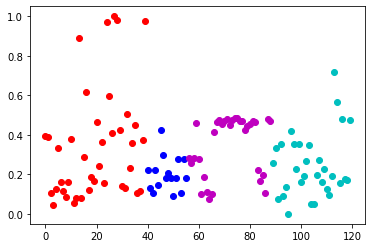

black=artifacts, green=extrahls, purple=murmur, cyan=normal


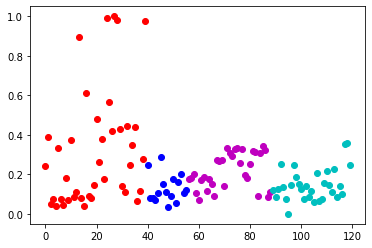

In [21]:
s1_boundsA, s2_boundsA = get_S1S2_bounds(x_dataA, dataA_peaks, 'A')
s1_boundstA, s2_boundstA = get_S1S2_bounds(x_testdataA, testdataA_peaks, 'A')

# Standard deviation of S1
stdS1_A = stdInterval(s1_boundsA,0,s1_boundsA,1, x_dataA)
stdS1_A = stdS1_A/max(stdS1_A)
featurePlot(stdS1_A, 'A')
stdS1_testA = stdInterval(s1_boundstA,0,s1_boundstA,1, x_testdataA)
stdS1_testA = stdS1_testA/max(stdS1_testA)

# Standard deviation of S2
stdS2_A = stdInterval(s2_boundsA,0,s2_boundsA,1, x_dataA)
stdS2_A = stdS2_A/max(stdS2_A)
featurePlot(stdS2_A, 'A')
stdS2_testA = stdInterval(s2_boundstA,0,s2_boundstA,1, x_testdataA)
stdS2_testA = stdS2_testA/max(stdS2_testA)